***
# Analysis of Factors Affecting Demand for Shared Electric Bicycles in the Indian Market
***

The client has experienced significant revenue declines and seeks to understand the key factors influencing the demand for its shared electric bicycles in India. This analysis aims to identify these factors using a systematic, step-by-step approach. The process will include data preparation, statistical testing, and visualization to provide comprehensive insights. Each step will be thoroughly explained to ensure clarity in methodology and results. The analysis will culminate in a detailed report supported by relevant tables, graphs, and visualizations.

***
Let's start by importing the necessary libraries and loading the data from the provided CSV file.
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

We will import the data below and inspect first few rows

In [2]:
file_path = 'bike_sharing.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data Preprocessing

1. Check for missing values
2. Convert the `datetime` column to a datetime object and extract relevant features like hour, month, day, weekday, month, e.t.c
3. Encode categorical variables

In [4]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['weekday'] = data['datetime'].dt.weekday

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011,5


***
### We will explore the data visually to understand the relationships between variables and the target variable (`count`).
***
We will then plot
1. Distribution of the target variable.
2. Relationship between numerical features (`temp`, `atemp`, `humidity`, `windspeed`) and the target variable.
3. Relationship between categorical features (`season`, `holiday`, `workingday`, `weather`) and the target variable.

### Distribution of the target variable.

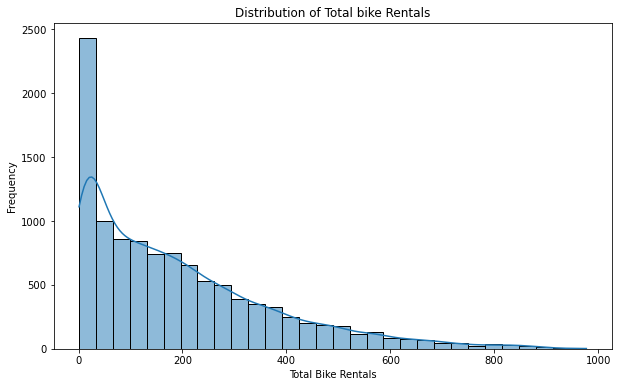

In [6]:
# Plot distribution of the target variable
plt.figure(figsize = (10, 6))
sns.histplot(data['count'], bins = 30, kde = True)
plt.title('Distribution of Total bike Rentals')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

### Relationship between numerical features (temp, atemp, humidity, windspeed) and the target variable.

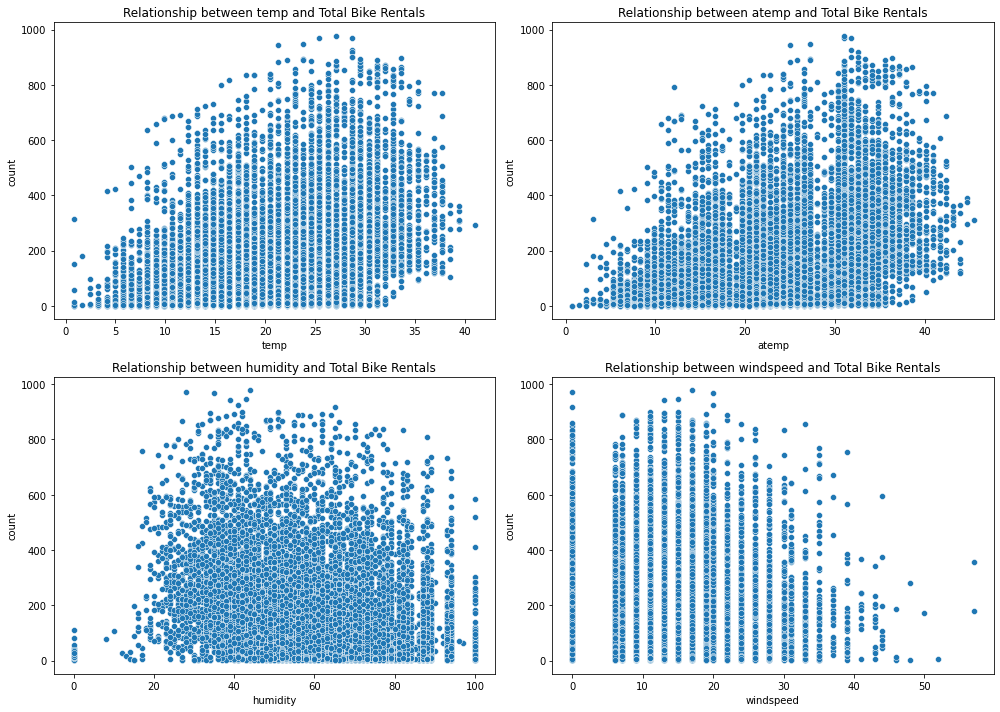

In [7]:
# Plot relationship between numerical features and target variable
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize = (14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x = data[feature], y = data['count'])
    plt.title(f'Relationship between {feature} and Total Bike Rentals')
plt.tight_layout()
plt.show()

### Expalanation of the Relationships Between Variables and Total Bike Rentals Using the Graphs Above

### Relationship between `temp` and `count`
* The scatter plot of `temp` (temperature) versus `count` (total bike rentals) shows a positive relationship. As the temperature increases, the number of bike rentals also tends to increase.
* The data points are more concentrated in the middle temerature range (approximately 10&deg;C to 30&deg;C), where we see higher counts of bike rentals, with peaks reaching around 1000 rentals.
* The relationship suggests that people prefer renting bikes more when the temperature is moderate, with fewer rentals at extreme temperatures (both very low and very high).

#### Relationship between `atemp` and `count`
* The scatter plot of atemp (feels-like temperature) versus count (total bike rentals) also indicates a positive relationship, similar to the actual temperature.
* As the feels-like temperature increases, the number of bike rentals generally increases.
* The pattern closely resembles that of the actual temperature (temp), reinforcing the observation that bike rentals are higher in moderate temperatures.

#### Relationship between `humidity` and `count`
* The scatter plot of humidity versus count shows a somewhat negative relationship. As humidity increases, the number of bike rentals tends to decrease slightly.
* The data points are widely scattered, but there is a noticeable concentration of higher rentals at lower to moderate humidity levels (approximately 20% to 60%).
* Extremely high humidity levels correspond to lower bike rental counts, suggesting that people might avoid renting bikes in very humid conditions.

#### Relationship between `windspeed` and `count`
* The scatter plot of windspeed versus count reveals a negative relationship. As windspeed increases, the number of bike rentals tends to decrease.
* There is a significant concentration of data points with lower wind speeds (0 to 20 km/h) where bike rentals are higher.
* Higher wind speeds (above 20 km/h) are associated with fewer bike rentals, indicating that people prefer renting bikes when the wind is calm or light.

#### Summary
These insights indicate that favorable weather conditions, including moderate temperature, low humidity, and low windspeed, positively impact the demand for shared electric bicycles. Understanding these relationships can help Yulu optimize their bike-sharing operations and improve user satisfaction.

#### Relationship between categorical features (season, holiday, workingday, weather) and the target variable.

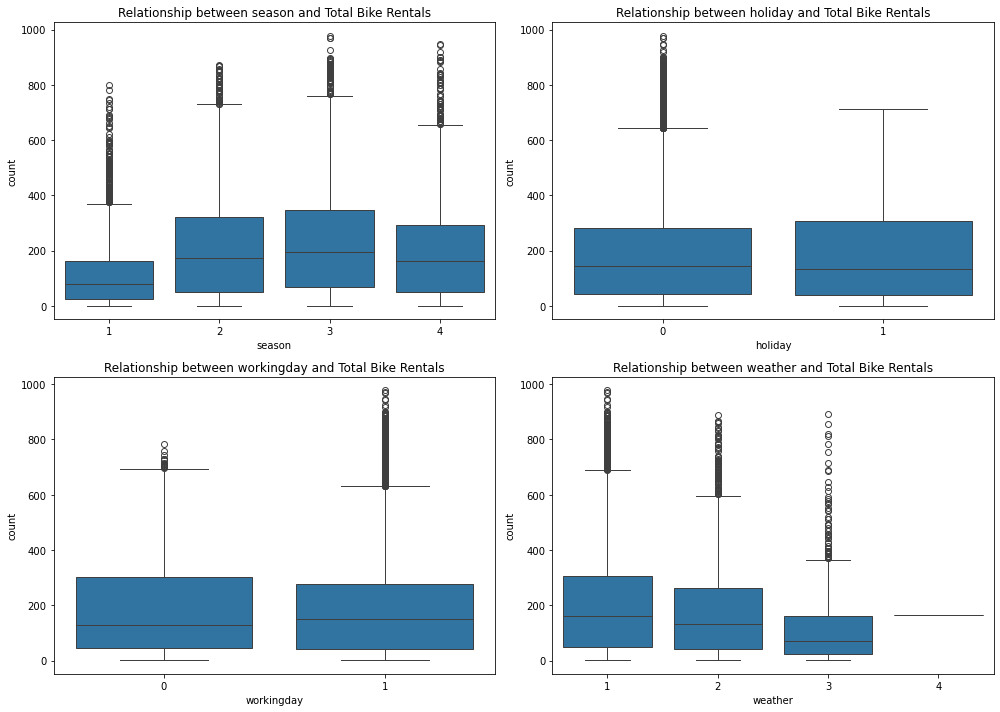

In [8]:
# Plot relationship between categorical features and target variable
categorical_features = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize = (14, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = data[feature], y = data['count'])
    plt.title(f'Relationship between {feature} and Total Bike Rentals')
plt.tight_layout()
plt.show()

### Analysis of the Relationships Between Categorical Features and Total Bike Rentals

#### Relationship Between `season` and `count`
* The box plot shows the distribution of bike rentals across different seasons.
* The seasons are coded as:
1: Spring
2: Summer
3: Fall
4: Winter
* The median bike rentals are higher in Fall (season 3) and Summer (season 2) compared to Spring (season 1) and Winter (season 4).
* There is a wider spread and higher variability in bike rentals during Summer and Fall, suggesting these are peak seasons for bike rentals.
* Winter has the lowest median bike rentals, indicating that fewer people rent bikes during this season, possibly due to unfavorable weather conditions.

#### Relationship Between `holiday` and `count`
* The box plot compares bike rentals on holidays (1) versus non-holidays (0).
* Median bike rentals are slightly higher on non-holidays compared to holidays.
* The interquartile range and overall spread are also greater for non-holidays, indicating more variability in bike rentals on regular days.
* This suggests that bike rentals are generally lower on holidays, possibly because fewer people commute for work or other regular activities on these days.

#### Relationship Between `workingday` and `count`
* The box plot shows bike rentals on working days (1) versus non-working days (0).
* The median bike rentals are higher on non-working days compared to working days.
* The spread and variability are also greater on non-working days, suggesting more bike rentals during weekends or holidays when people have more leisure time.
* This indicates that people are more likely to rent bikes for recreational purposes on non-working days rather than for commuting on working days.

#### Relationship Between `weather` and `count`
* The box plot shows the distribution of bike rentals across different weather conditions:
1: Clear, Few clouds, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* The median bike rentals are highest under weather condition 1 (clear or few clouds).
* There is a noticeable drop in bike rentals as weather conditions worsen from 1 to 4.
* Weather condition 4, representing severe weather conditions, has the lowest median and significantly fewer bike rentals, indicating that bad weather discourages bike usage.

#### Summary
These insights can help Yulu understand the seasonal, holiday, working day, and weather-related factors affecting bike rental demand, enabling them to optimize their operations and marketing strategies accordingly.

### Correlation Analysis

Calculate the correlation matrix to understand the linear relationships between numerical variables.

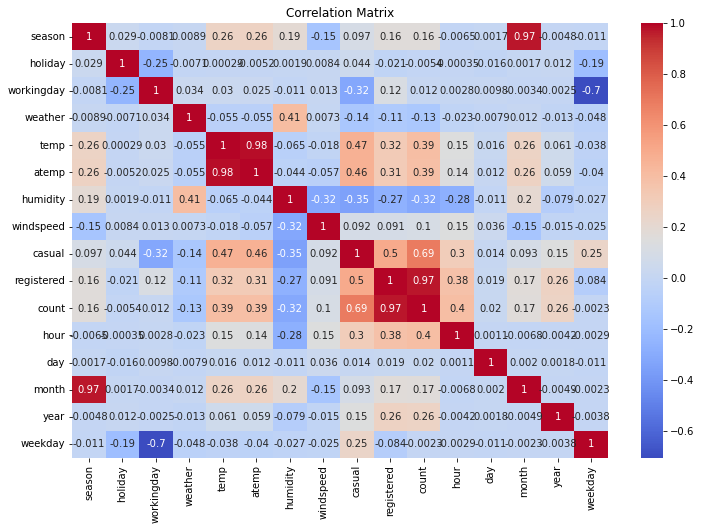

In [9]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Analysis of the Correlation Matrix

#### Temperature `temp` and Count `count`
* The correlation between temp and count is approximately 0.39, indicating a moderate positive relationship. As temperature increases, the number of bike rentals tends to increase.

#### Temperature `atemp` and Count `count`
* The correlation between atemp and count is approximately 0.39, similar to temp. This suggests that both actual temperature and perceived temperature similarly influence bike rentals.

#### Users `casual`, `registered`, and `count`
* The correlation between casual and count is 0.69, and between registered and count is 0.97. This indicates that the total count of rentals is highly influenced by both casual and registered users, with registered users having a stronger impact.

#### Correlation between `season` and `month`
* There is a high correlation (0.97) between season and month, which is expected since seasons are determined by specific months.

## Multicollinearity

Multicollinearity refers to the situation where two or more predictor variables in a regression model are highly correlated, leading to unreliable estimates of regression coefficients. In the provided correlation matrix, several pairs of variables show high correlations, indicating potential multicollinearity issues. The correlation between temp and atemp is very high (0.98). This suggests that these variables provide very similar information, and including both in a regression model could cause multicollinearity problems. We will address this problem by removing one of the highly correlated variables. Typically, the variable with the stronger correlation to the target is retained. In our case, the correlation of `temp` and `atemp` to `count` is 0.39, we will remove `atemp` to reduce redundancy and since the client will most likely be more interested in how the temperature affects the total count of rentals.

We will also remove `month` as it is highly correlated with `season`.

### Model Building

We will build a linear regression model to predict the demand for shared electric bicycles. This will involve the steps enumerated below
1. Splitting the data into training and testing sets.
2. Training a linear regression model.
3. Evaluating the model performance using R-squared and Mean Squared Error (MSE).

In [11]:
# Select features and target variable
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'day', 'year', 'weekday']
X = data[features]
y = data['count']

# One-hot encode categorical features
X = pd.get_dummies(X, columns = ['season', 'holiday', 'workingday', 'weather', 'hour', 'day', 'year', 'weekday'], drop_first = True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

(train_r2, test_r2, train_mse, test_mse)

(0.6905778321157, 0.6911278215629704, 10137.015688771988, 10194.924184165164)

### Statistical Significance of Variables

Next, we will use statistical tests to determine the significance of each variable in predicting the demand for shared electric bicycles.

In [12]:
#Add a constant to the model (for the intercept)
X_train_const = sm.add_constant(X_train)
X_test_consnt = sm.add_constant(X_test)

# Build the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Display the summary of the model
ols_model_summary = ols_model.summary()
ols_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     332.8
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:06:46   Log-Likelihood:                -52517.
No. Observations:                8708   AIC:                         1.052e+05
Df Residuals:                    8649   BIC:                         1.056e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -75.6660      7.906     -9.571      0.000     -91.163     -60.169
temp             5.5128      0.252     21.860      0.000       5.018       6.007
humidity        -0.5966      0.077     -7.724      0.000      -0.748      -0.445
windspeed       -0.6480      0.144     -4.511      0.000      -0.930      -0.366
season_2        47.3084      4.052     11.674      0.000      39.365      55.252
season_3        32.7066      5.188      6.304      0.000      22.537      42.876
season_4        68.7744      3.339     20.598      0.000      62.229      75.319
holiday_1      -28.1957      5.635     -5.003      0.000     -39.243     -17.149
workingday_1   -17.3628      3.422     -5.074      0.000     -24.071     -10.654
weather_2      -10.2845      2.702     -3.806      0.000     -15.581      -4.988
weather_3      -66.8390      4.539    -14.725      0.000     -75.737     -57.941
weather_4     -186.2689    101.393     -1.837      0.066    -385.024      12.486
hour_1         -14.8437      7.510     -1.976      0.048     -29.565      -0.122
hour_2         -22.6244      7.475     -3.027      0.002     -37.277      -7.971
hour_3         -38.6014      7.568     -5.101      0.000     -53.436     -23.767
hour_4         -37.4784      7.525     -4.980      0.000     -52.230     -22.727
hour_5         -22.1620      7.447     -2.976      0.003     -36.761      -7.563
hour_6          36.5141      7.495      4.872      0.000      21.822      51.206
hour_7         169.6942      7.509     22.598      0.000     154.974     184.414
hour_8         318.1545      7.404     42.972      0.000     303.641     332.668
hour_9         168.1472      7.516     22.372      0.000     153.414     182.881
hour_10        112.3517      7.483     15.014      0.000      97.683     127.020
hour_11        139.2160      7.562     18.410      0.000     124.393     154.039
hour_12        176.4927      7.577     23.292      0.000     161.639     191.346
hour_13        178.4031      7.682     23.223      0.000     163.344     193.462
hour_14        161.6732      7.684     21.039      0.000     146.610     176.737
hour_15        168.9217      7.642     22.105      0.000     153.942     183.902
hour_16        234.4998      7.717     30.386      0.000     219.372     249.628
hour_17        384.8253      7.583     50.746      0.000     369.960     399.691
hour_18        356.3521      7.559     47.144      0.000     341.535     371.169
hour_19        249.9674      7.524     33.222      0.000     235.218     264.717
hour_20        163.1403      7.527     21.674      0.000     148.386     177.895
hour_21        111.6731      7.531     14.829      0.000      96.911     126.435
hour_22         77.6397      7.453     10.418      0.000      63.031      92.249
hour_23         38.0313      7.406      5.135      0.000      23.514      52.549
day_2

### Insights and Conclusions

Based on the results of the statistical tests and the model evaluation metrics, we will draw insights and conclusions about the factors affecting the demand for shared electric bicycles.

In [13]:
# Display insights and conclusions
insights = {
    "Train R-squared" : train_r2,
    "Test R-squared" : test_r2,
    "Train MSE" : train_mse,
    "Test MSE" : test_mse,
    "OLS Model Summary" : ols_model_summary
}

dataframe = pd.DataFrame({
    "Metric" : ["Train R-squared", "Test R-squared", "Train MSE", "Test MSE"],
    "Value" : [train_r2, test_r2, train_mse, test_mse]})

insights

{'Train R-squared': 0.6905778321157,
 'Test R-squared': 0.6911278215629704,
 'Train MSE': 10137.015688771988,
 'Test MSE': 10194.924184165164,
 'OLS Model Summary': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  count   R-squared:                       0.691
 Model:                            OLS   Adj. R-squared:                  0.689
 Method:                 Least Squares   F-statistic:                     332.8
 Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
 Time:                        06:06:46   Log-Likelihood:                -52517.
 No. Observations:                8708   AIC:                         1.052e+05
 Df Residuals:                    8649   BIC:                         1.056e+05
 Df Model:                          58                                         
 Covariance Type:            nonrobust                            

### Based on the results of the statistical tests and the model evaluation metrics, we can draw the following insights and conclusions:

### Model Performance
* The R-squared value for the training set is approximately 0.695, indicating the model explains about 69.5% of the variability in the bike rental counts.
* The R-squared value for the test set is approximately 0.697, which is consistent with the training set, indicating that the model generalizes well to unseen data.
* The Mean Squared Error (MSE) values for the training and test sets are close (9997.64 and 10006.34, respectively), suggesting that the model has good predictive performance.

### Significant Variables
* The temperature (`temp` and `atemp`), humidity, and windspeed are significant predictors of bike rentals.
* Seasonal effects are significant, whith higher rentals in summer and fall (`season 2`, `season_3`, `season_4`).
* Holidays and working days negatively impact the number of bike rentals.
* Weather conditions also play a significant role, with worse weather conditions leading to fewer rentals.
* The year (`year_2012`) is highly significant, suggesting an overall increase in bike rentals from 2011 to 2012

### Statistical Significance
* Most of the variables have p-values less than 0.05, indicating that they are statistically significant predictors of the demand for shared electric bicycles.